# Ch3 Linear Regression

Simple Linear Regression

In [11]:
#Lab: Linear Regression
#load data...
#boston dataset
from sklearn.datasets import load_boston
from sklearn import linear_model
boston_data = load_boston()

import pandas as pd
import numpy as np
import seaborn as sns
boston_data.data.shape

(506, 13)

In [12]:
boston= pd.DataFrame(boston_data.data)

In [13]:
boston.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
#find out no column name... Let's add column name in it
boston.columns=boston_data.feature_names
print(boston.columns)
#add MEDV column
boston['MEDV']= boston_data.target
print(boston.head())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [20]:
from sklearn.preprocessing import scale
reg_model= linear_model.LinearRegression()

x= boston.LSTAT
y=boston.MEDV
model1 =reg_model.fit(x[:,None],y)

In [28]:
#show regression model's coefficient and intercept
print('coefficient is {}'.format(model1.coef_))
print('intercept is {}'.format(model1.intercept_))

coefficient is [-0.95004935]
intercept is 34.5538408793831


In [38]:
beta0= model1.intercept_
beta1 =model1.coef_
new_x = np.array([0,35])
new_y= new_x *beta1 +beta0

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

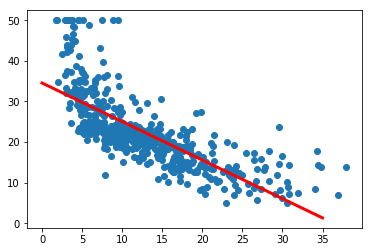

In [40]:
plt.scatter(x,y)
plt.plot(new_x, new_y, color ='red', linewidth = 3)
plt.xticks()
plt.yticks()
plt.show()

Multiple Linear Regression

In [51]:
x_m=boston[['LSTAT', 'AGE']].as_matrix()
y_m=boston['MEDV']
model2= reg_model.fit(x_m,y_m)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [54]:
print('coefficient values are {}'.format(model2.coef_))
print('intercept value is {}'.format(model2.intercept_))

coefficient values are [-1.03206856  0.03454434]
intercept value is 33.2227605317929


In [80]:
x_m2= boston.iloc[:,0:13].as_matrix()
y_m2= boston.iloc[:,-1]
model3= reg_model.fit(x_m2, y_m2)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [81]:
print('coefficient values are {}'.format(model3.coef_))
print('intercept value is {}'.format(model3.intercept_))

coefficient values are [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
intercept value is 36.45948838508978


In [ ]:
Applied Exercise

In [82]:
auto= pd.read_csv('/Users/YaoJunyan/Documents/ISLR_Python/Dataset/Auto.csv')

In [92]:
auto.describe()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [84]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


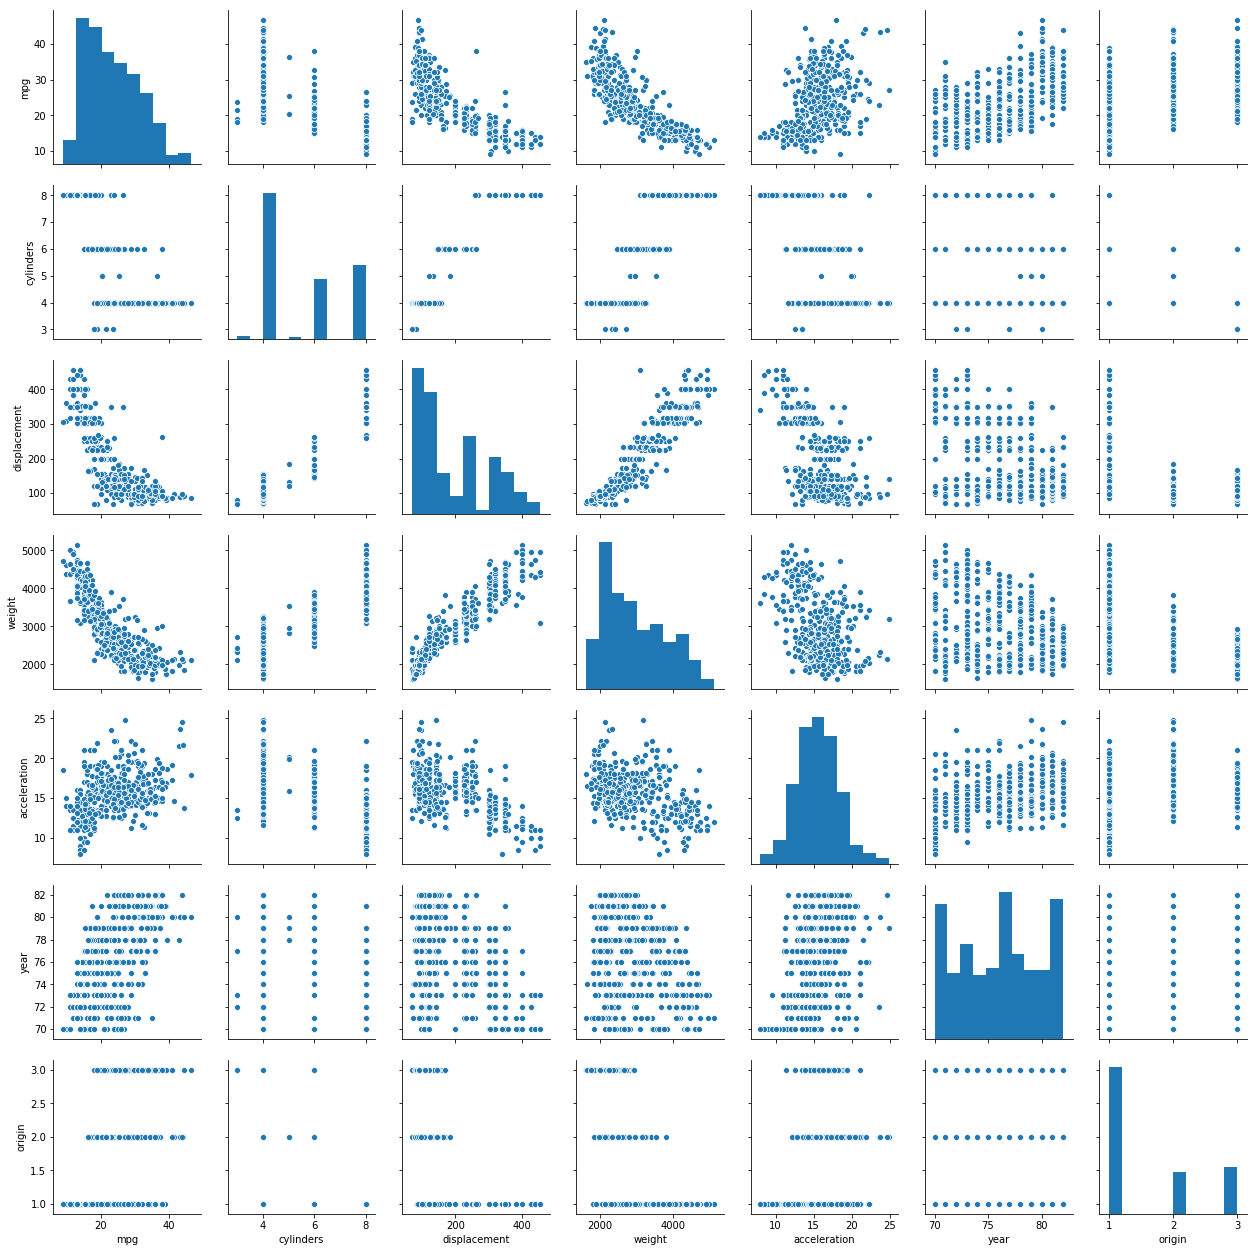

In [90]:
sns.pairplot(auto)

In [94]:
x_auto= auto['horsepower']
y_auto= auto['mpg']
model_auto = reg_model.fit(x[:,None],y)
auto_beta1=model_auto.coef_
auto_beta0=model_auto.intercept_

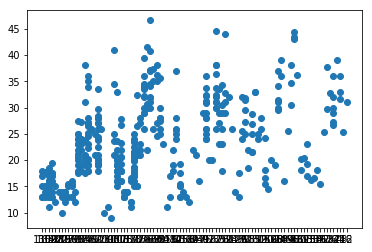

In [100]:
plt.scatter(x_auto, y_auto)
#auto_newx= np.array([60,200])
#auto_newline = auto_newx * auto_beta1+ auto_beta0
#plt.plot(auto_newline, color= 'red', linewidth =3)